In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales= pd.read_csv(r"C:\Users\Chiselas\Assignments\Assignment 10\KAG_conversion_data.csv")

In [4]:
sales.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
sales.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 89.4+ KB


In [7]:
sales.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [8]:
X= pd.get_dummies(sales, columns=["age", "gender"], prefix=["age", "gender"])

In [9]:
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


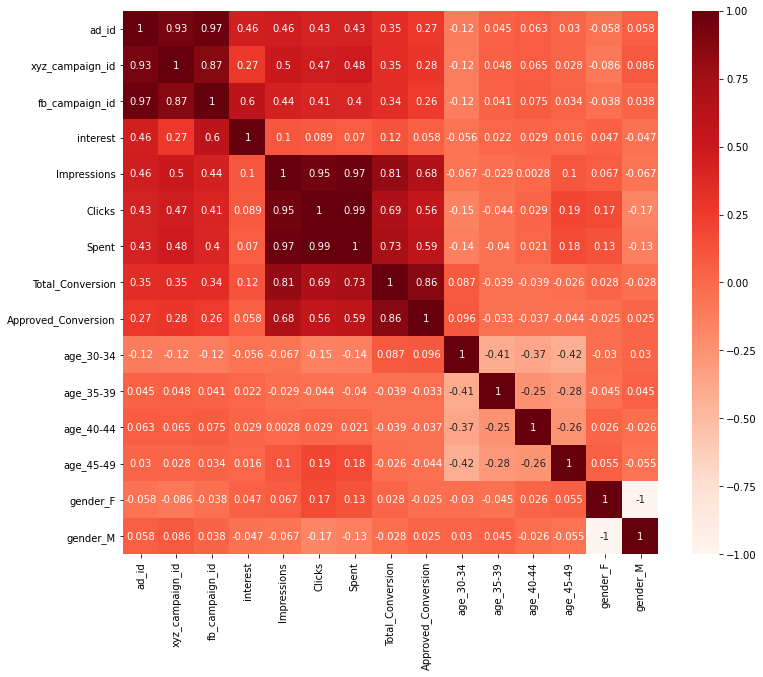

In [10]:
plt.figure(figsize=(12,10))
cor =X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
X=X.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest'], axis=1)

In [12]:
X.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.43,2,1,1,0,0,0,0,1
1,17861,2,1.82,2,0,1,0,0,0,0,1
2,693,0,0.00,1,0,1,0,0,0,0,1
3,4259,1,1.25,1,0,1,0,0,0,0,1
4,4133,1,1.29,1,1,1,0,0,0,0,1


They are highly correlated with each other and they are the columns that don't provide us with any significant data that the ML can learn from.

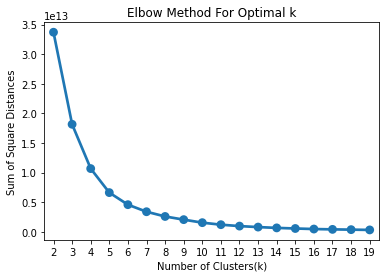

In [13]:
from sklearn.cluster import KMeans
import seaborn as sns 
sum_of_sq_dist = {}
for k in range(2,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
KMean_clust = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

y_means = KMean_clust.labels_


In [16]:
sales['Advert_Type']=y_means
sales.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,3
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,3
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,3
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,3
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,3


In [41]:
high_sales=sales.groupby(['Advert_Type','age'])['Approved_Conversion'].sum().reset_index()
high_sales

,Advert_Type,age,Approved_Conversion
0,0,30-34,96
1,0,35-39,54
2,0,40-44,36
3,0,45-49,31
4,1,30-34,61
5,1,40-44,6
6,1,45-49,7
7,2,30-34,73
8,2,35-39,36
9,2,40-44,39


In [46]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.bar(high_sales, x='Advert_Type', y='Approved_Conversion', color= 'age', title='Sales by Advert Type')
fig.update_layout(barmode='group')
fig.show()

Advert Type 3 lead to the highest and most consistent amount of sales by custoemrs of all the age groups.

In [44]:
gender_spent=sales.groupby(['gender'])['Spent'].sum().reset_index()
gender_spent

,gender,Spent
0,F,34502.619963
1,M,24202.609995


In [47]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = px.bar(gender_spent, x='gender', y='Spent', title='Ad Spending by Gender')
fig.update_layout(barmode='group')
fig.show()

They are not gender natural when it comes to Ad spending as they advertise more for women.

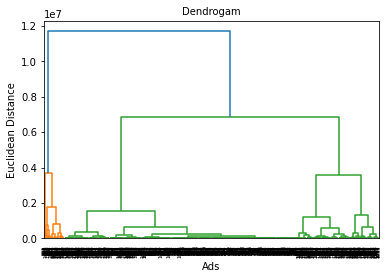

<Figure size 720x504 with 0 Axes>

In [60]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 10)
plt.xlabel('Ads')
plt.ylabel('Euclidean Distance')
plt.figure(figsize=(10,7))
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc
sales['Advert_Type_hc']=y_hc
sales.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type,Advert_Type_hc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,3,2
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,3,2
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,3,2
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,3,2
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,3,2


<Figure size 504x504 with 0 Axes>

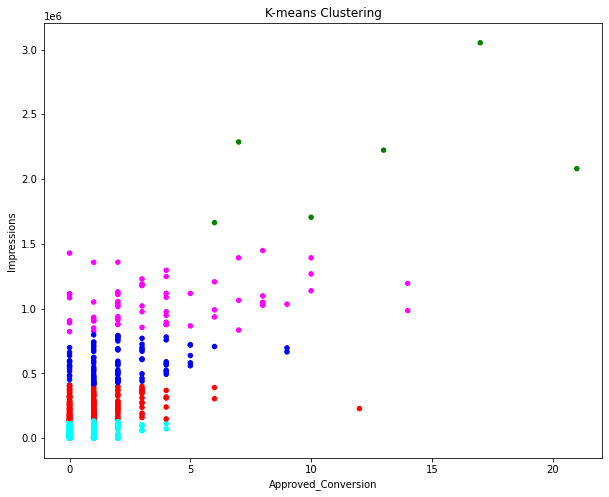

In [78]:
plt.figure(figsize=(7,7))

Colors = ["red", "green", "blue", "cyan", "magenta"]
sales['Colors'] = sales['Advert_Type'].map(lambda p: Colors[p])
sales['Colors_hc'] = sales['Advert_Type_hc'].map(lambda p: Colors[p])
ax = sales.plot(    
    kind="scatter", 
    x="Approved_Conversion", y="Impressions",
    figsize=(10,8), title="K-means Clustering",
    c = sales['Colors']
)


<Figure size 504x504 with 0 Axes>

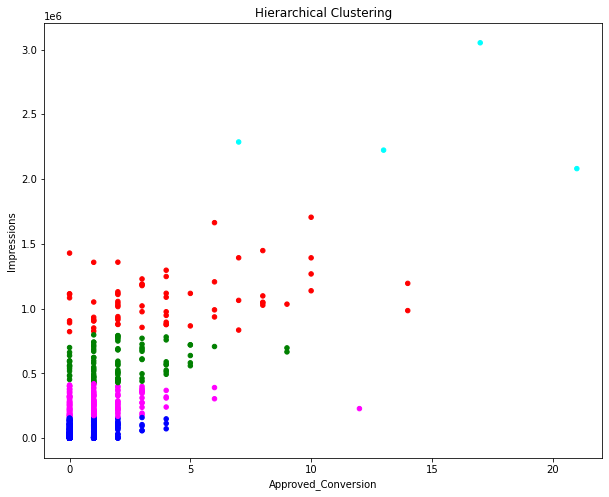

In [76]:
plt.figure(figsize=(7,7))

Colors = ["red", "green", "blue", "cyan", "magenta"]
ax = sales.plot(    
    kind="scatter", 
    x="Approved_Conversion", y="Impressions", title="Hierarchical Clustering",
    figsize=(10,8),
    c = sales['Colors_hc']
)

The two methods provided similar results in terms of how it created the different clusters, the only difference is the numberings of the clusters.